In [163]:
import numpy as np 
import pandas as pd

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [165]:
warnings.filterwarnings("ignore", category=FutureWarning)

#### Importing the Dataset

In [166]:
Email_classifier_df = pd.read_csv(
    r"C:\DataFiles\Masters2023\Data Science\Email Spam Classifier\spam.csv",
    encoding="latin1"
)

In [167]:
Email_classifier_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [168]:
Email_classifier_df.shape

(5572, 5)

### 1. Data Cleaning

In [169]:
Email_classifier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [170]:
Email_classifier_df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [171]:
Email_classifier_df.sample(5)

,v1,v2
5038,ham,Pls clarify back if an open return ticket that...
4423,ham,Update your face book status frequently :)
2749,ham,You said not now. No problem. When you can. Le...
3528,spam,Xmas & New Years Eve tickets are now on sale f...
1335,ham,"Sometimes we put walls around our hearts,not j..."


In [172]:
# Renaming the Columns
Email_classifier_df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
Email_classifier_df.sample(5)

,target,text
1098,ham,NO GIFTS!! You trying to get me to throw mysel...
723,ham,Ya even those cookies have jelly on them
3357,ham,I don't run away frm u... I walk slowly &amp; ...
4206,ham,"Lets use it next week, princess :)"
4483,ham,Shopping? Eh ger i toking abt syd leh...Haha


In [173]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [174]:
Email_classifier_df['target'] = encoder.fit_transform(Email_classifier_df['target'])
Email_classifier_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [175]:
Email_classifier_df.isnull().sum()

target    0
text      0
dtype: int64

In [176]:
# Check for Duplicate Values
Email_classifier_df = Email_classifier_df.drop_duplicates(keep='first')

In [177]:
Email_classifier_df.shape

(5169, 2)

### 2. EDA

In [178]:
Email_classifier_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [179]:
Email_classifier_df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

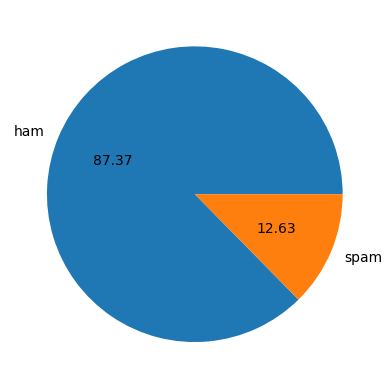

In [180]:
# Dataset is highly imbalanced
plt.pie(Email_classifier_df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [181]:
import nltk

In [182]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [183]:
Email_classifier_df['num_of_characters'] = Email_classifier_df['text'].apply(len)

In [184]:
Email_classifier_df.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [185]:
# Number of Words
Email_classifier_df['num_of_words'] = Email_classifier_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [186]:
Email_classifier_df.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [187]:
Email_classifier_df['num_of_sentences'] = Email_classifier_df['text'].apply(lambda x:nltk.sent_tokenize(x))

In [188]:
Email_classifier_df[['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words
count,5169.000000,5169.000000
mean,78.977945,18.455794
std,58.236293,13.324758
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,26.000000
max,910.000000,220.000000


In [189]:
# ham
Email_classifier_df[Email_classifier_df['target'] == 0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words
count,4516.000000,4516.000000
mean,70.459256,17.123782
std,56.358207,13.493970
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


In [190]:
# spam
Email_classifier_df[Email_classifier_df['target'] == 1][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


<Axes: xlabel='num_of_characters', ylabel='Count'>

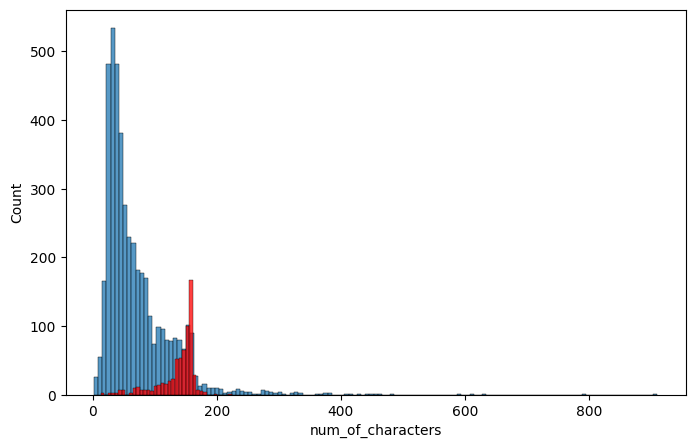

In [191]:
plt.figure(figsize=(8,5))
sns.histplot(Email_classifier_df[Email_classifier_df['target'] == 0]['num_of_characters'])
sns.histplot(Email_classifier_df[Email_classifier_df['target'] == 1]['num_of_characters'], color='red')

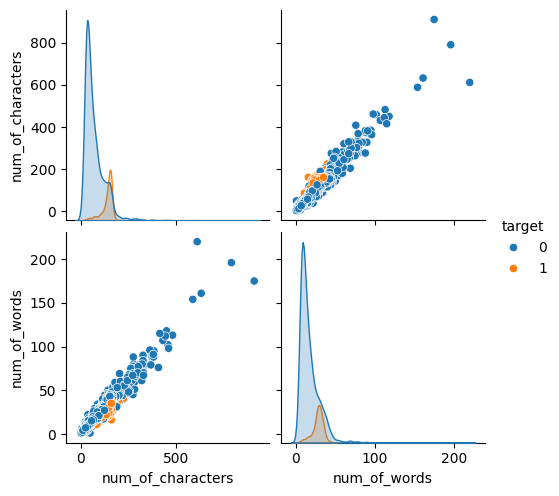

In [192]:
sns.pairplot(Email_classifier_df,hue='target')

<Axes: >

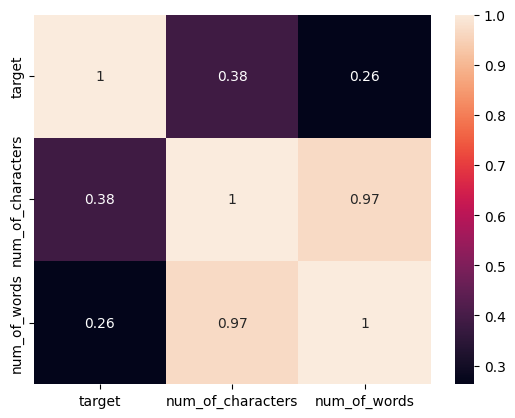

In [193]:
sns.heatmap(Email_classifier_df.select_dtypes(include='number').corr(), annot=True)

### 3. Text Preprocessing
- Lower case  
- Tokenization  
- Removing special characters  
- Removing stopwords and punctuation  
- Stemming

In [194]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):

    # Lower Case
    text = text.lower()

    # Tokenization
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stopwords and punctuation 
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [195]:
Email_classifier_df['transformed_text'] = Email_classifier_df['text'].apply(transform_text)

In [196]:
Email_classifier_df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",nah think goe usf live around though


In [197]:
from wordcloud import WordCloud
wc = WordCloud(width=50, height=50, min_font_size=10, background_color='white')

In [198]:
spam_wc = wc.generate(Email_classifier_df[Email_classifier_df['target'] == 1]['transformed_text'].str.cat(sep=" "))

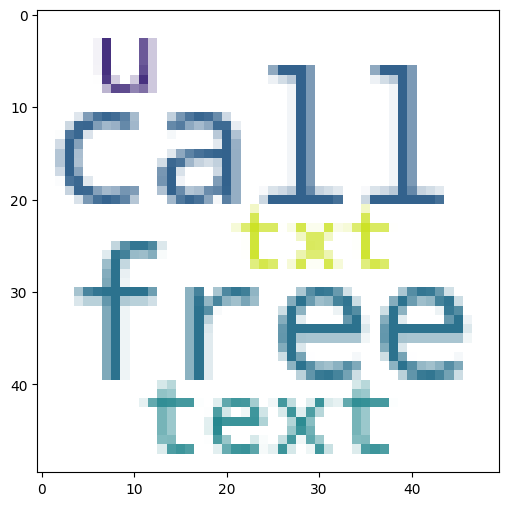

In [199]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [200]:
ham_wc = wc.generate(Email_classifier_df[Email_classifier_df['target'] == 0]['transformed_text'].str.cat(sep=" "))

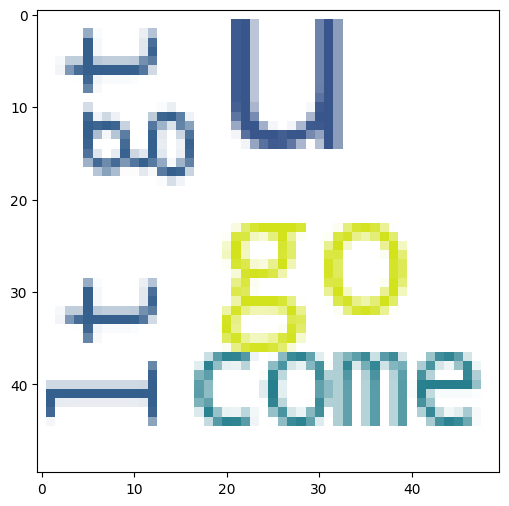

In [201]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [202]:
spam_corpus = []
for msg in Email_classifier_df[Email_classifier_df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [203]:
len(spam_corpus)

9939

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

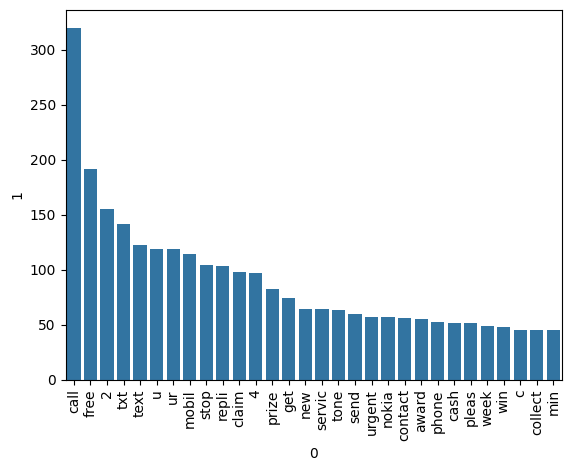

In [204]:
from collections import Counter

freq = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=freq[0], y=freq[1])
plt.xticks(rotation='vertical')

In [205]:
ham_corpus = []
for msg in Email_classifier_df[Email_classifier_df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

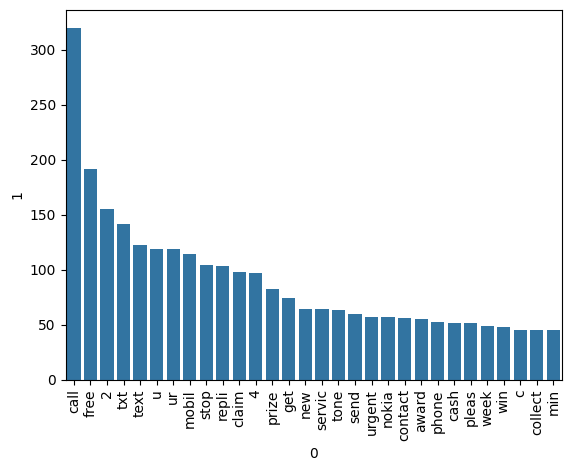

In [206]:
from collections import Counter

freq = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=freq[0], y=freq[1])
plt.xticks(rotation='vertical')

In [207]:
# Text Vectorization
# Using a bag of words
Email_classifier_df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",nah think goe usf live around though


### 4. Model Building

In [208]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [209]:
X = tfidf.fit_transform(Email_classifier_df['transformed_text']).toarray()

In [210]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [211]:
# appending the num_character col to X
#X = np.hstack((X,Email_classifier_df['num_of_characters'].values.reshape(-1,1)))

In [212]:
X.shape

(5169, 3000)

In [213]:
y = Email_classifier_df['target'].values

In [214]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [215]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [216]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [217]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [218]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [219]:
# tfidf --> MNB

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [221]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [222]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [223]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [224]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [225]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [226]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [227]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [228]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [229]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


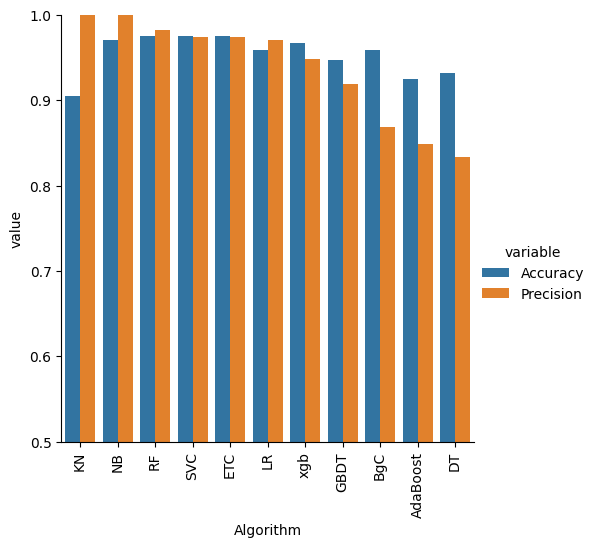

In [230]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model Improvement
    - Change the max_features parameter of TfIdf

In [231]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [232]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [233]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [234]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [235]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [236]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837


In [237]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [238]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [239]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [240]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [241]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [242]:
from sklearn.ensemble import StackingClassifier

In [243]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [244]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [246]:
from sklearn.naive_bayes import MultinomialNB
import pickle

clf = MultinomialNB()
clf.fit(X_train, y_train)

pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(clf, open('model.pkl','wb'))
